In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [10]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    First Occurance Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in range(num_episodes):
        if i_episode%10000==0:  # used for debugging
            print("episode %d"%(i_episode))
            sys.stdout.flush()
        
        # generate an episode
        episode= []
        state= env.reset()
        for t in range(100):
            action= policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state,action,reward))
            if done: 
                break
            state= next_state
        
        # MC first-occurance sampling - offline evaluation
        state_in_episode= set([x[0] for x in episode])
        for s in state_in_episode:
            first_occur_idx= next(i for i,x in enumerate(episode) if x[0] == s)
            Gt= sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occur_idx:])])
            returns_sum[s] += Gt
            returns_count[s] += 1
            V[s]= returns_sum[s]/returns_count[s]

    return V    

In [11]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

episode 0


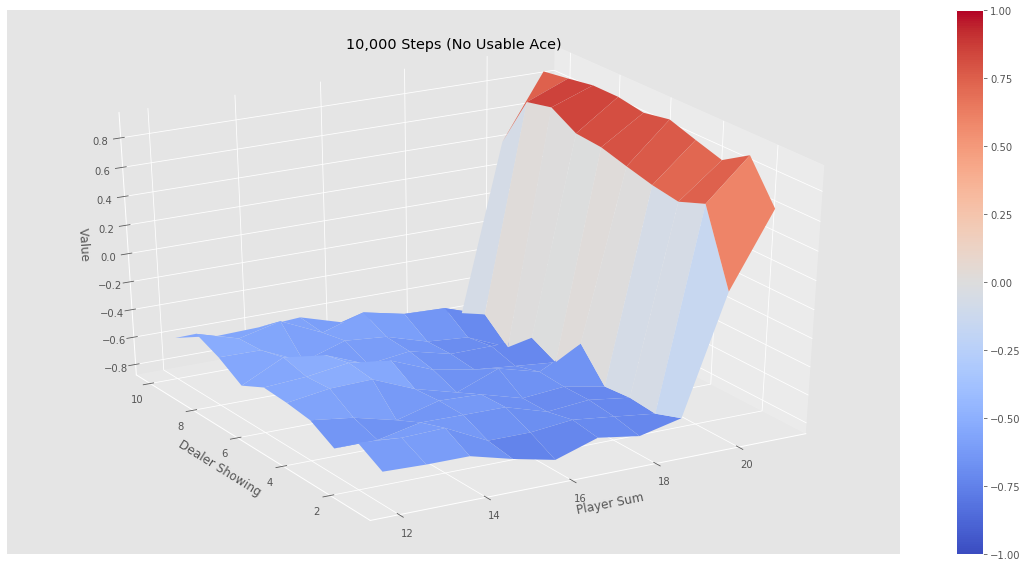

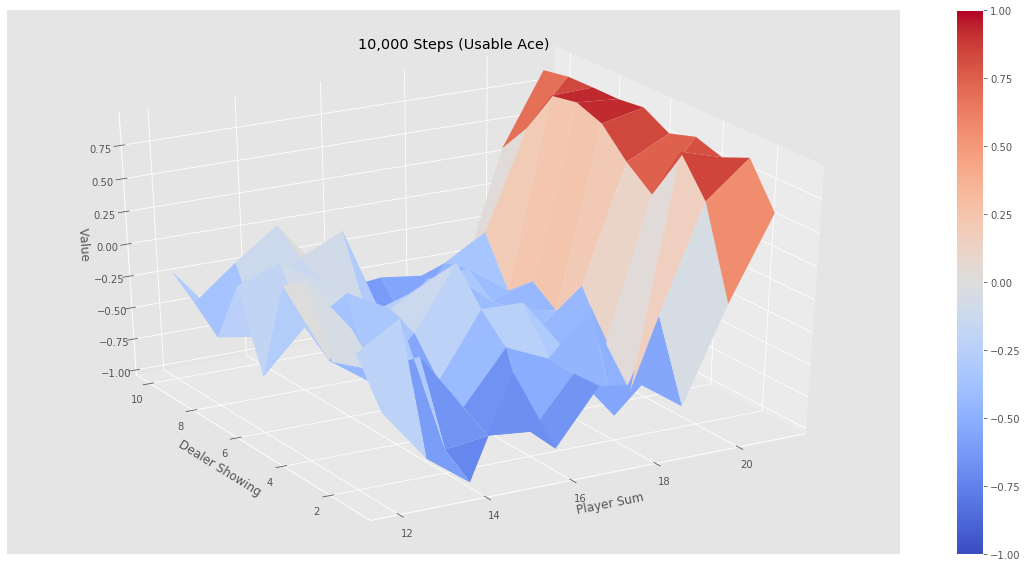

episode 0
episode 10000
episode 20000
episode 30000
episode 40000
episode 50000
episode 60000
episode 70000
episode 80000
episode 90000
episode 100000
episode 110000
episode 120000
episode 130000
episode 140000
episode 150000
episode 160000
episode 170000
episode 180000
episode 190000
episode 200000
episode 210000
episode 220000
episode 230000
episode 240000
episode 250000
episode 260000
episode 270000
episode 280000
episode 290000
episode 300000
episode 310000
episode 320000
episode 330000
episode 340000
episode 350000
episode 360000
episode 370000
episode 380000
episode 390000
episode 400000
episode 410000
episode 420000
episode 430000
episode 440000
episode 450000
episode 460000
episode 470000
episode 480000
episode 490000


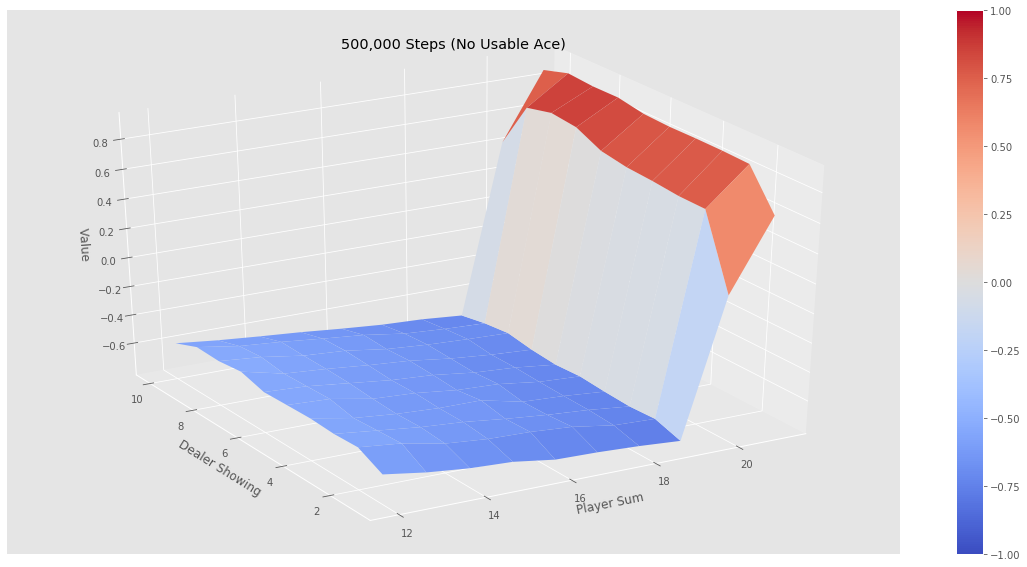

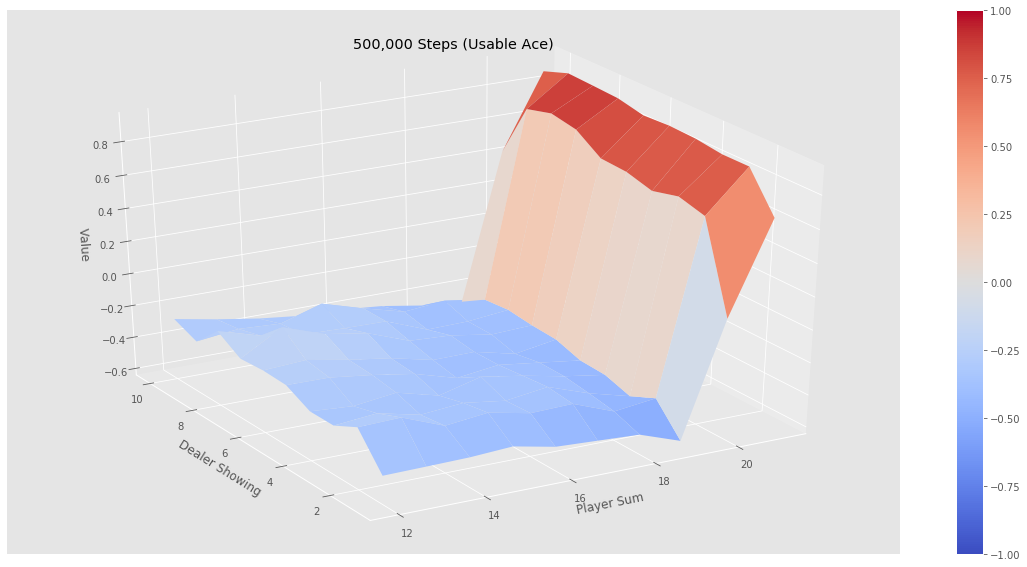

In [12]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")